Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [17]:
library('tidyverse')
library('ggrepel')

In [3]:
avengers = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv',
    col_types = cols()
)

Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [4]:
avengers |> head(1)

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.


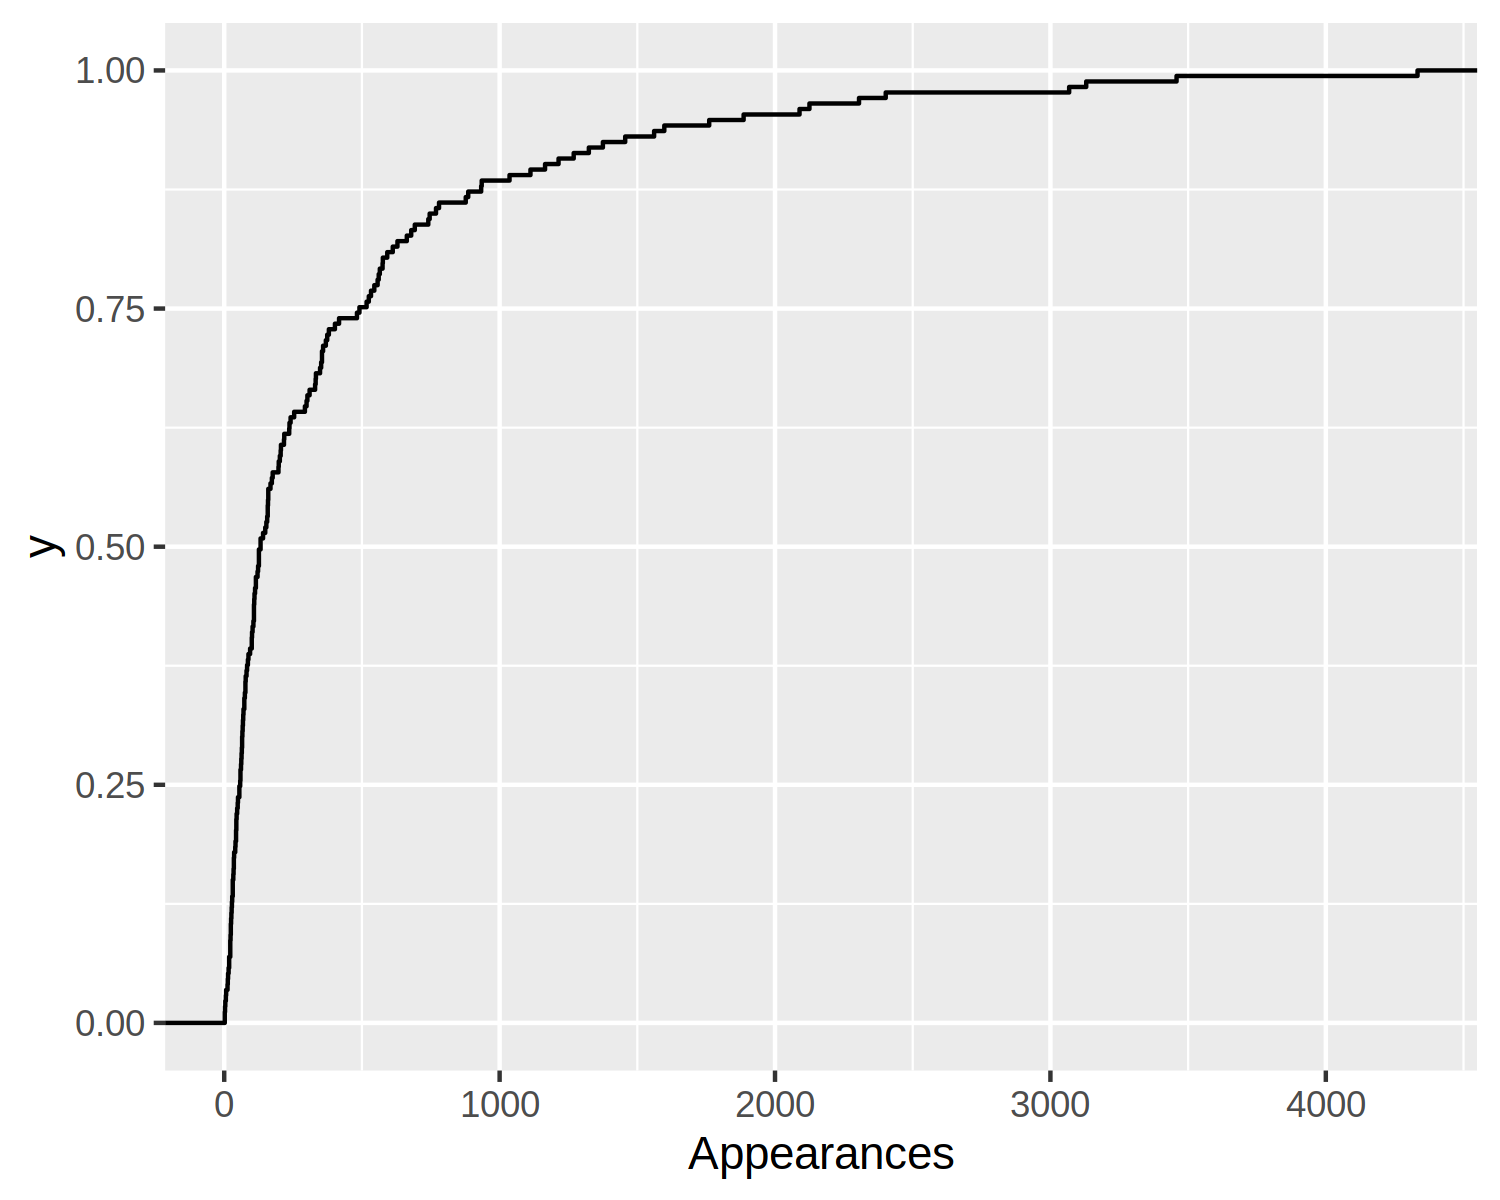

In [5]:
p = ggplot(avengers, aes(x=Appearances)) + stat_ecdf()
p

In [7]:
avengers |>
    select(`Name/Alias`, Appearances) |>
    arrange(Appearances) |> head() |>
    mutate(rk = row_number() / n()) |> head() #or tail to look at the ranks
#use ` because there is a slash

Name/Alias,Appearances,rk
<chr>,<dbl>,<dbl>
Moira Brandon,2,0.1666667
Fiona,2,0.3333333
Doug Taggert,3,0.5000000
Gene Lorrene,4,0.6666667
Dennis Sykes,6,0.8333333
NA,7,1.0000000


In [25]:
avengers2 = avengers |>
    mutate(ypos = rank(Appearances, ties.method = 'first') / n()) |>
    select(`Name/Alias`, Appearances, ypos) |>
    arrange(desc(ypos))

avengers2

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Peter Benjamin Parker,4333,1.0000000
Steven Rogers,3458,0.9942197
"James ""Logan"" Howlett",3130,0.9884393
"Anthony Edward ""Tony"" Stark",3068,0.9826590
Thor Odinson,2402,0.9768786
Benjamin Jacob Grimm,2305,0.9710983
Reed Richards,2125,0.9653179
Robert Bruce Banner,2089,0.9595376
Henry P. McCoy,1886,0.9537572


In [26]:
avengers3 = avengers |>
    select(`Name/Alias`, Appearances) |>
    arrange(Appearances) |>
    mutate(ypos = row_number() / n())

avengers3

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Moira Brandon,2,0.005780347
Fiona,2,0.011560694
Doug Taggert,3,0.017341040
Gene Lorrene,4,0.023121387
Dennis Sykes,6,0.028901734
NA,7,0.034682081
Monica Chang,12,0.040462428
Alexis,13,0.046242775
NA,14,0.052023121


In [30]:
avengers3 |> 
    filter(ypos>.8, ypos<.85)

Name/Alias,Appearances,ypos
<chr>,<dbl>,<dbl>
Samuel Thomas Wilson,576,0.8034682
Alex Summers,592,0.8092486
Richard Milhouse Jones,612,0.8150289
Daniel Thomas Rand K'ai,629,0.8208092
James Buchanan Barnes,663,0.8265896
Samuel Guthrie,679,0.8323699
Simon Williams,692,0.8381503
Heracles,741,0.8439306
Flash Thompson,746,0.8497110


In [22]:
highlight = avengers |> filter(`Name/Alias` == "James Buchanan Barnes")

In [34]:
p = ggplot(avengers3, aes(x = Appearances, y = ypos)) +
    geom_point() +
    geom_line() +
    geom_text_repel(
        data = highlight, 
        mapping = aes(label = `Name/Alias`),
        hjust = 0,
        nudge_x = 0.5,
        nudge_y = -0.15,
        box.padding = 0.5,
        segment.curvature = 1,
        segment.ncp = 2,
        segment.angle = 0
    ) +
    scale_y_continuous(labels = scales::percent_format())

p

ERROR while rich displaying an object: Error in `geom_text_repel()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 3rd layer.
Caused by error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (1)
✖ Fix the following mappings: `y`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null